In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
IN_PATH = "/shared/3/projects/newsDiffusion/data/processed/fullDataWithClustNums.tsv"
df = pd.read_csv(IN_PATH, sep="\t")

df["date"] = pd.to_datetime(df["date"])
df = df.dropna(subset=["date"])


#we can only keep clusters whose first article occured after the 
#first day of local coverage in our data, 4/1
firstLocDate = min(df.loc[df["national"] == False, "date"])
clusteredDates = df[["clustNum", "date"]].groupby(by="clustNum").agg(list).reset_index()
clusteredDates["minDate"] = clusteredDates["date"].apply(lambda x: min(x))
keepClusts = clusteredDates.loc[clusteredDates["minDate"] >= firstLocDate, "clustNum"]

df = df[df["clustNum"].isin(keepClusts)]
len(df)


<ipython-input-3-f9b757047d9d>:2: DtypeWarning: Columns (2,3,10,11,13,14,17,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(IN_PATH, sep="\t")


690039

In [66]:
mcDf = df[df["content"].str.contains("McCloskey")]

In [67]:
mcGrouped = mcDf[["date", "key"]].groupby("date").agg(len).reset_index()

In [68]:
withinWeek = mcGrouped.set_index("date")["2020-06-28":"2020-07-4"]
sum(withinWeek["key"])

105

In [72]:
max(mcGrouped["key"])

64

In [79]:
spelunkDf = mcDf[["date", "title", "content"]].set_index("date")
spelunkDf["2020-12-11":].sort_values("date")

,title,content
date,,
2020-12-11,Judge dismisses St. Louis prosecutor from McCl...,A judge on Thursday disqualified the St. Louis...
2020-12-11,St Louis prosecutor is struck off part of McCl...,The St Louis chief prosecutor has been struck ...
2020-12-11,Judge Drops Hammer In McCloskey Case — Disqual...,It was one of the most viral moments in the su...
2020-12-11,Judge Dismisses Attorney Kim Gardner from McCl...,A St. Louis judge dismissed Circuit Attorney K...
2020-12-11,Judge Dismisses Dem Prosecutor for Fundraising...,A Missouri judge on Thursday dismissed Circuit...
2020-12-11,St. Louis Prosecutor Taken Off Case Of Couple ...,St. Louis Prosecutor Taken Off Case Of Couple ...
2020-12-11,Dem Circuit Attorney Thrown Out of McCloskey C...,"A St. Louis , Missouri , attorney has been bar..."
2020-12-11,Iowa Dem Who Lost Narrow Election Admits She C...,Democrats were handed a series of stunning def...
2020-12-11,A SETBACK FOR POLITICAL PERSECUTION: Judge di...,A SETBACK FOR POLITICAL PERSECUTION : Judge di...


In [76]:
spelunkDf

,title,content
date,,
2020-04-03,Property transfers March 19 to March 25,"Bar Harbor Properties Inc., Bar Harbor to Kenn..."
2020-05-04,County record,-1:54 p.m.: drugs. Deputies received a report ...
2020-05-07,County record,-2:28 p.m.: trespassing. Deputies responded to...
2020-05-11,County record,-12:24 p.m.: property damage crash. Deputies r...
2020-05-27,Westmoreland County recalling furloughed workers,Nearly half of the 475 Westmoreland County gov...
...,...,...
2020-07-04,Armed Ken and Karen Trigger America – Four Thi...,( Isaac Davis ) A wealthy couple in St. Louis ...
2020-07-21,Missouri AG Files to Dismiss Charges Against M...,"( Hank Berrien ) On Monday , following the new..."
2020-07-23,St. Louis Prosecutor’s Office Busted Altering ...,Assistant Circuit Attorney Chris Hinckley orde...


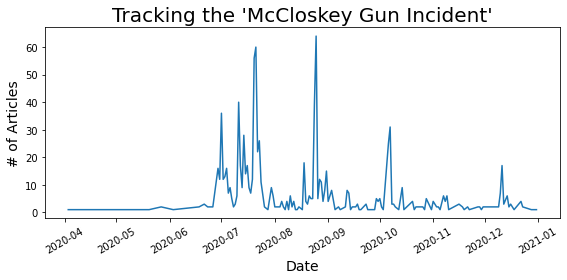

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x="date", y="key", data=mcGrouped.sort_values("key"), ax=ax)
plt.title("Tracking the 'McCloskey Gun Incident'", size=20)
plt.xticks(rotation=30, size=10)
ax.set_xlabel("Date", size=14)
ax.set_ylabel("# of Articles", size=14)
plt.tight_layout()

In [43]:
fig.savefig("/home/blitt/projects/localNews/reports/figures/proposal/mcCloskey.pdf")